In [1]:
#librerie
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from google.colab import drive
from scipy import integrate
from time import sleep
from scipy.optimize import curve_fit

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path="drive/MyDrive/Lab HPGE/Data/"
nomefile="Spectrum_Ge_Ba133_2000_g100_tot_timeaxis.txt" 

f=open(path+nomefile,"r")
lines=f.readlines() #leggo linee del file
colonna1=[]
for riga in lines:
    colonna1.append(riga.split()[0])
f.close()

all_integrals_values = np.asarray(colonna1, dtype=np.float64)
len(all_integrals_values)

63540

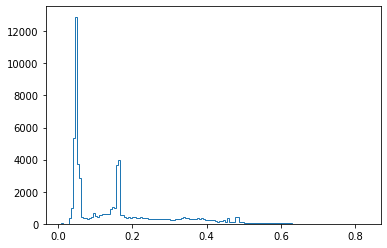

In [277]:
#histogram of the spectrum for all data of Barium

numb_bins=150 #try to change this maybe

histogramma=plt.hist(all_integrals_values,bins=numb_bins,histtype="step")
#plt.ylim(0,700)   #to cut the y axis 
#plt.xlim(0.05,0.15) #primi picchi
#plt.xlim(0.08,0.12) #ultimi picchi
#plt.yscale("log")




#plt.xlim(0.15,0.17)
plt.show()

In [181]:
def gaussian(x, N, mu,sigma,h):
    return N * np.exp(-0.5*((x-mu)/sigma)**2)+h

In [182]:
value_53keV=histogramma[0]
center_53keV=[0.5*(histogramma[1][i]+histogramma[1][i+1]) for i in range(len(histogramma[1])-1)]
center_53keV=np.array(center_53keV)

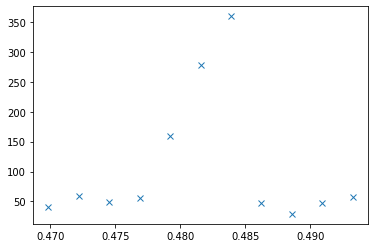

In [189]:
plt.plot(center_53keV[197:208],value_53keV[197:208],ls="",marker="x")

In [190]:
init_vals = [140,0.48 ,0.007,60]
best_vals, covar = curve_fit(gaussian, center_53keV[197:208], value_53keV[197:208],p0=init_vals) 

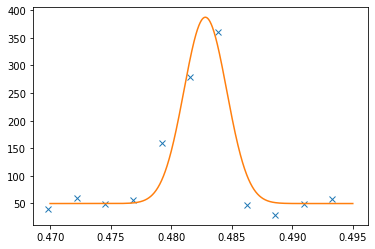

In [191]:
plt.plot(center_53keV[197:208],value_53keV[197:208],ls="",marker="x")
x=np.linspace(0.47,0.495,1000)
plt.plot(x,gaussian(x,*best_vals))


In [ ]:
mu_383kev=best_vals[1]
sigma_383kev=best_vals[2]

Calibrazione dello spettro

In [ ]:
#TABELLE Ba133

In [ ]:
#Gammas from 133Ba (10.51 y 5)

# Eg (keV)    Ig (%)    Decay mode

# 53.161 1 	  2.199 22 	    e ###
# 79.6139 26 	2.62 6 	      e 
# 80.9971 14 	34.06 27 	    e ###
# 160.613 8 	0.645 8 	    e 
# 223.234 12 	0.450 4 	    e 
# 276.398 2 	7.164 22 	    e ###
# 302.853 1 	18.33 6 	    e #
# 356.017 2 	62.05 19 	    e ###
# 383.851 3 	8.94 3 	        e #

In [ ]:
# X-rays from 133Ba (10.51 y 5)
# E (keV)   	I (%)    	Assignment
# 3,795  	0.24 3  	Cs Ll
# 4,142  	0.110 11  	Cs Lh
# 4,272  	0.66 8  	Cs La2
# 4,286  	6.0 7  	Cs La1
# 4,620  	3.8 4  	Cs Lb1
# 4,649  	0.56 11  	Cs Lb4
# 4,717  	0.93 19  	Cs Lb3
# 4,781  	0.048 6  	Cs Lb6
# 4,934  	1.19 14  	Cs Lb2
# 5,281  	0.54 6  	Cs Lg1
# 5,542  	0.15 3  	Cs Lg2
# 5,553  	0.22 5  	Cs Lg3
# 30,270  0.00401 14  Cs Ka3
# 30,625  	34.9 9  	Cs Ka2
# 30,973  	64.5 17  	Cs Ka1 ###
# 34,920  	5.99 16  	Cs Kb3
# 34,987  	11.6 3  	Cs Kb1
# 35,252  	0.123 5  	Cs Kb5
# 35,818  	3.58 9  	Cs Kb2
# 35,907  	0.74 3  	Cs Kb4

In [15]:
#picchi più alti per Ba133 estrapolati dalle tabelle

E_real_peaks=[30.920,53.161,80.9971,223.234276.398,302.85,356.017] #keV
E_real_peaks=np.array(E_real_peaks)

#stima spacca e pesa dal grafico -->incertezza notevole

x_uncalibrated_peaks=[0.06,0.1,0.16,0.445,0.46,0.485,0.495] #scala non calibrata
x_uncalibrated_peaks=np.array(x_uncalibrated_peaks)

757.3232174834792 -26.52908493613559


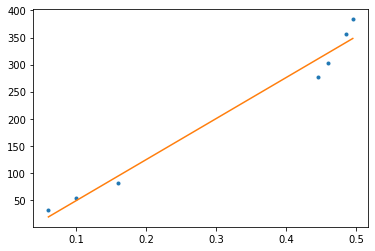

In [16]:
def linear(x, m, q):
  return m*x+q

#fitting 
init_vals = [1000,20]  # for [N,mu, wid]
best_vals, covar = curve_fit(linear, x_uncalibrated_peaks, E_real_peaks,p0=init_vals) 


plt.plot(x_uncalibrated_peaks,E_real_peaks,ls="",marker=".")
plt.plot(x_uncalibrated_peaks,linear(x_uncalibrated_peaks,best_vals[0],best_vals[1]))
print(best_vals[0],best_vals[1])

In [137]:
mu_80kev=best_vals[1]
sigma_80kev=best_vals[2]


In [104]:
mu_30kev=best_vals[1]
sigma_30kev=best_vals[2]

In [121]:
mu_53kev=best_vals[1]
sigma_53kev=best_vals[2]

In [163]:
mu_276kev=best_vals[1]
sigma_276kev=best_vals[2]

In [173]:
mu_302kev=best_vals[1]
sigma_302kev=best_vals[2]

In [192]:
mu_356kev=best_vals[1]
sigma_356kev=best_vals[2]

In [256]:
mu_cal=[mu_30kev,mu_53kev,mu_80kev,mu_276kev,mu_302kev,mu_356kev]
sigma_cal=[sigma_30kev,sigma_53kev,sigma_80kev,sigma_276kev,sigma_302kev,sigma_356kev]

In [262]:
mu_cal=np.array(0.0486,0.09703,0.1606,0.444,0.45877,0.48828)
sigma_cal=np.array(0.00338,0.00305,0.00305,0.00069,0.00176,0.001767)

E_real_peaks=[30.920,53.161,80.9971,223.234,276.398,302.853] #keV
E_real_peaks=np.array(E_real_peaks)

0.0020366109618458624 -0.010210032245539177


(0.0, 0.5)

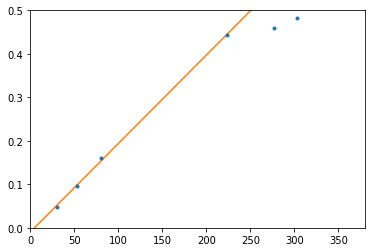

In [267]:
def linear(x, m,q):
  return m*x+q

#fitting 
init_vals = [1000,20]  # for [N,mu, wid]
best_vals, covar = curve_fit(linear,E_real_peaks[0:4], mu_cal[0:4],p0=init_vals,sigma=sigma_cal[0:4]) 

x_cal=np.linspace(0,400)

plt.errorbar(E_real_peaks,mu_cal,yerr=sigma_cal,fmt=".")
plt.plot(x_cal,linear(x_cal,0.0020366109618458624,-0.010210032245539177))
print(best_vals[0],best_vals[1])
plt.xlim(0,380)
plt.ylim(0,0.5)

In [268]:
m=0.0020366109618458624
q=-0.010210032245539177

print((mu_302kev-q)/m)
print((mu_356kev-q)/m)

230.2796128100384
242.08461069712743
